In [6]:
from qiskit import *
import numpy as np
from numpy import pi

In [77]:
delta = 0.3
epsilon = 0.2
dt = 0.1

Gamma = 1

theta = 2*np.arcsin(np.sqrt(Gamma*dt))

z_arg = -delta*dt / 2
y_arg = -epsilon*dt

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(3, 'c')

qc = QuantumCircuit(qreg_q, creg_c)

for _ in range(100):
    qc.u(z_arg, y_arg, z_arg, qreg_q[0])

    qc.cu(theta, 0, 0, theta, qreg_q[0], qreg_q[1])
    qc.cx(qreg_q[1], qreg_q[0])
    qc.measure(qreg_q[1], creg_c[0])
    qc.reset(qreg_q[1])

qc.measure(qreg_q[0], creg_c[1])

# qc.draw()

In [78]:
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
result_sim.get_counts()

{'000': 1018, '001': 6}

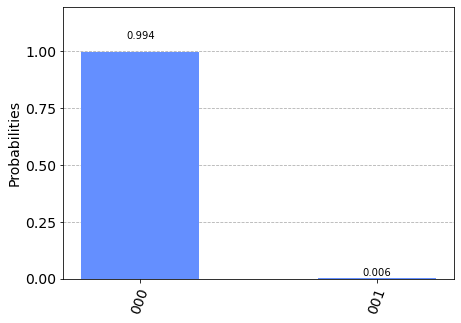

In [79]:
from qiskit.visualization import plot_histogram
plot_histogram(result_sim.get_counts())

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table